# Imports and loading data

In [0]:
import numpy as np
import scipy.misc

URL_ENDPOINT = "http://cs.mcgill.ca/~ksinha4/datasets/kaggle/"

train_x = np.loadtxt(URL_ENDPOINT+"train_x.csv", delimiter=",")
train_y = np.loadtxt(URL_ENDPOINT+"train_y.csv", delimiter=",")
test_y = np.loadtxt(URL_ENDPOINT+"test_x.csv", delimiter=",")

imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

reshape data

In [0]:
train_x = train_x.reshape(-1, 64, 64) # reshape
train_y = train_y.reshape(-1, 1)

# Sample printed images

[4.] [7.] [1.] [0.] [8.]


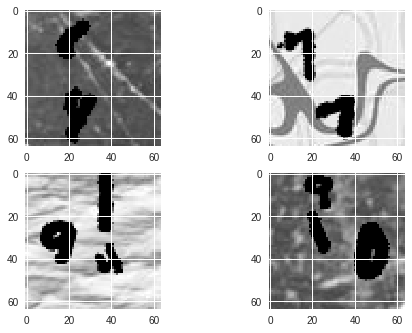

In [4]:
print(train_y[0],train_y[1],train_y[2],train_y[3],train_y[4])

plt.subplot(221)
plt.imshow(train_x[0],cmap='gray_r')
plt.subplot(222)
plt.imshow(train_x[1],cmap='gray_r')
plt.subplot(223)
plt.imshow(train_x[2],cmap='gray_r')
plt.subplot(224)
plt.imshow(train_x[3],cmap='gray_r')
plt.show()

# Preprocessing


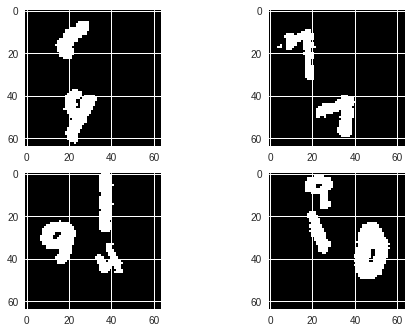

In [5]:
# Set threshold and maxValue
thresh = 254 # note on threshold, we might lose info by making such a hard split
             # loosing some of the info on the edges, setting a more smooth split might help
maxValue = 255
 
# sample output for first 4 images of the dataset using threshold 
plt.subplot(221)
th, dst = cv2.threshold(train_x[0], thresh, maxValue, cv2.THRESH_BINARY);
plt.imshow(dst,cmap='gray')
plt.subplot(222)
th, dst = cv2.threshold(train_x[1], thresh, maxValue, cv2.THRESH_BINARY);
plt.imshow(dst,cmap='gray')
plt.subplot(223)
th, dst = cv2.threshold(train_x[2], thresh, maxValue, cv2.THRESH_BINARY);
plt.imshow(dst,cmap='gray')
plt.subplot(224)
th, dst = cv2.threshold(train_x[3], thresh, maxValue, cv2.THRESH_BINARY);
plt.imshow(dst,cmap='gray')
plt.show()

In [0]:
def img_blackNwhite(img,thresh,maxValue):
  ''' function for turning origional image into black and white image
      using threshold
  '''
  # turn image to binary black and white
  th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY);
  
  # convert numpy array to unsigned 8 bit to work with FindCountours()
  dst = dst.astype(np.uint8)
  
  return dst

In [0]:
def get_bounding_box(img,tresh,maxValue):
  
  ''' 
      function that returns the rectangle coordinates for bouding box given
      an given 
      
      - input: is a 64 x 64 image, the treshold and maxValue for seperating background
      - return: list of rectangle coordinates
  '''
  # turn image to binary black and white
  th, dst = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY);
  
  # convert numpy array to unsigned 8 bit to work with FindCountours()
  dst = dst.astype(np.uint8)
  
  # Find Contours
  image, contours, hier = cv2.findContours(dst, cv2.RETR_EXTERNAL,
                cv2.CHAIN_APPROX_SIMPLE)
  
  # Get rectangles
  rectangles = []
  images = []
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    rectangles.append((x-2,y-2,w+2,h+2))
    #image = cv2.rectangle(dst,(x-2,y-2),(x+w+2,y+h+2),(100,100,0),1)
    plt.imshow(image[y-2:y+h+2,x-2:x+w+2],cmap='gray')
    plt.show()
    images.append(img)
    
  return images

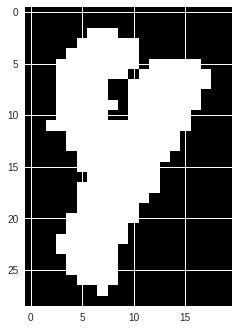

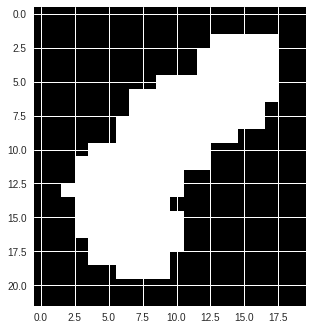

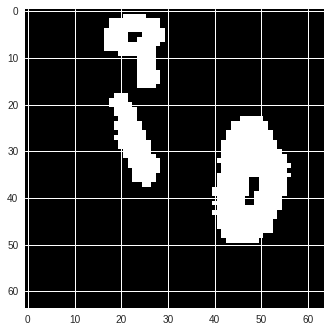

In [11]:
def get_bounding_img(img,rect_coords):
  
  ''' 
     - img: image from dataset after using threshold 
     - rect_coords: list of rectangle coordinates returned from get bounding_box
     - return: just the smaller img based on rect_coords
  '''
  
  
  return img

get_bounding_box(train_x[0],thresh,maxValue)


# # bounding rectange for first image
# rectangles = get_bounding_box(train_x[0],thresh,maxValue)
# print (rectangles[0][0])
# print(dst)


# # turn image to binary black and white
# th, dst = cv2.threshold(train_x[0], thresh, maxValue, cv2.THRESH_BINARY);

# # convert numpy array to unsigned 8 bit
# dst = dst.astype(np.uint8)

# # print image
#plt.imshow(dst,cmap='gray')
#plt.show()

# # Find Contours and plot
# image, contours, hier = cv2.findContours(dst, cv2.RETR_EXTERNAL,
#                 cv2.CHAIN_APPROX_SIMPLE)


# # first contour 
# cnt = contours[0]
# x,y,w,h = cv2.boundingRect(cnt)


# image = cv2.rectangle(dst,(x-2,y-2),(x+w+2,y+h+2),(100,100,0),1)
# plt.imshow(image)

# print(x,y,w,h)

# cnt = contours[1]
# x,y,w,h = cv2.boundingRect(cnt)
# image = cv2.rectangle(dst,(x-2,y-2),(x+w+2,y+h+2),(100,100,0),1)
# print(x,y,w,h)
# plt.imshow(image,cmap='gray')
# plt.show()



# Baseline model training ( takes a long time to train )

In [0]:
def flatten_data(data):
  print(data.shape[0])
  new_data = np.zeros((data.shape[0],4096))
  counter = 0
  for img in data:
    new_data[counter] = img.flatten()
    counter+=1
  return new_data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(flatten_data(train_x), train_y, test_size=0.2, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

50000
(40000, 4096) (40000, 1)
(10000, 4096) (10000, 1)


In [0]:
models = [LinearSVC(), LogisticRegression()]
names = ['SVM', 'LogisticReg']

for name, model in zip(names, models):
	model.fit(x_train, y_train)
	preds = model.predict(x_test)
	acc = accuracy_score(y_test, preds)
	print('Model{}gotaccuracy{}'.format(name, acc))